<h1 align="center"> TensorFlow Linear Regression </h1>

Basic TensorFlow: Linear Regression Gradient Descent 

**if this tutorial doesn't cover what you are looking for, please leave a comment below the youtube video and I will try to cover what you are interested in.**

<h3 align='Left'> Importing Libraries</h3>

In [408]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [409]:
google = web.DataReader('GOOG', data_source = 'google', start = '3/14/2009', end = '4/14/2016')
google.head()

,Open,High,Low,Close,Volume
Date,,,,,
2009-03-16,162.83,164.70,159.14,159.69,NaN
2009-03-17,159.93,167.50,159.39,167.50,NaN
2009-03-18,167.24,169.83,163.86,166.38,NaN
2009-03-19,165.67,167.83,163.53,164.81,NaN
2009-03-20,164.98,166.33,163.01,164.91,NaN


In [410]:
negative = (len(google)/2.0)*-1
positive = (len(google)/2.0)

In [411]:
google['ticks'] = np.arange(negative,positive,1.0)
google.head()

,Open,High,Low,Close,Volume,ticks
Date,,,,,,
2009-03-16,162.83,164.70,159.14,159.69,NaN,-891.5
2009-03-17,159.93,167.50,159.39,167.50,NaN,-890.5
2009-03-18,167.24,169.83,163.86,166.38,NaN,-889.5
2009-03-19,165.67,167.83,163.53,164.81,NaN,-888.5
2009-03-20,164.98,166.33,163.01,164.91,NaN,-887.5


In [412]:
# Parameters
learning_rate = 0.000001
training_epochs = 25
display_step = 1

In [413]:
# Training Data
train_X = google['ticks'].values
train_Y = google['Open'].values
train_Y = train_Y- train_Y.mean()
n_samples = train_X.shape[0]

In [414]:
# tf Graph Input
rng = np.random

X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(0.0, name="bias")

In [415]:
# Construct a linear model
pred = tf.add(tf.mul(X, W), b)

In [416]:
# Initializing the variables
init = tf.initialize_all_variables()

In [417]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [418]:
# Initializing the variables
init = tf.initialize_all_variables()
cost_array = []
weight_array = []
intercept_array = []
epic_num = []

Epoch: 0001 cost= 2148.049560547 W= 0.355019 b= 1.92158e-06
Epoch: 0002 cost= 1874.262573242 W= 0.338984 b= 3.40111e-06
Epoch: 0003 cost= 1710.388793945 W= 0.326681 b= 4.54124e-06
Epoch: 0004 cost= 1611.841674805 W= 0.317242 b= 5.42112e-06
Epoch: 0005 cost= 1552.233032227 W= 0.31 b= 6.1013e-06
Epoch: 0006 cost= 1515.915405273 W= 0.304444 b= 6.62837e-06
Epoch: 0007 cost= 1493.598754883 W= 0.30018 b= 7.03783e-06
Epoch: 0008 cost= 1479.741577148 W= 0.29691 b= 7.35702e-06
Epoch: 0009 cost= 1471.030029297 W= 0.2944 b= 7.60718e-06
Epoch: 0010 cost= 1465.475585938 W= 0.292474 b= 7.8042e-06
Epoch: 0011 cost= 1461.881958008 W= 0.290997 b= 7.96041e-06
Epoch: 0012 cost= 1459.516723633 W= 0.289864 b= 8.08542e-06
Epoch: 0013 cost= 1457.932983398 W= 0.288995 b= 8.18639e-06
Epoch: 0014 cost= 1456.852783203 W= 0.288327 b= 8.26906e-06
Epoch: 0015 cost= 1456.103759766 W= 0.287816 b= 8.33749e-06
Epoch: 0016 cost= 1455.576660156 W= 0.287423 b= 8.39517e-06
Epoch: 0017 cost= 1455.200073242 W= 0.287122 b= 8.

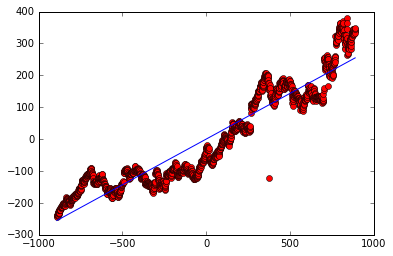

In [419]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if ((epoch+1) % display_step == 0):
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            epic_num.append(epoch+1)
            cost_array.append(c)
            weight_array.append(sess.run(W))
            intercept_array.append(sess.run(b))
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    weight = sess.run(W)
    intercept = sess.run(b)
    print "Training cost=", training_cost, "W=", weight, "b=",intercept, '\n'
    
    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.show()

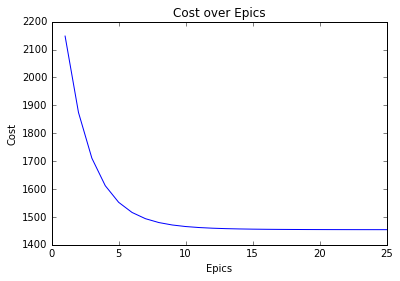

In [421]:
plt.plot(epic_num, cost_array)
plt.ylabel('Cost');
plt.title('Cost over Epics');
plt.xlabel('Epics');